In [1]:
from trajopt import *
from correctness_helpers import *

In [10]:
# Test case 1 -- almost replicating paper, working nonlinear example

J = np.diag([100, 100, 100]) # kg*m^2
x0 = np.array([0, 0, 0, 0.5, 0.5, 0.5, 0.5]) # [w_x, w_y, w_z, q_w, q_x, q_y, q_z]
xn = np.array([0, 0, 0, 0.0258, 0.0258, 0.0258, 0.999]) # [w_x, w_y, w_z, q_w, q_x, q_y, q_z]
c = np.array([[0.75, 0.433, 0.5]]).T
s = np.array([[0, 0, 1]]).T # Boresight along z
dt = 0.05
N = 100
abstol = 1e-3
theta = 40

# Try and generate quaternion slew...
x_guess = generate_linear_quaternion_trajectory(x0, xn, N)

trajectory = optimize_trajectory(x0, xn, dt, N, J, attitude_constraint=True, avoidance_angle=theta, c=c, s=s, x_init=x_guess)
trajectory_sdp = optimize_trajectory(x0, xn, dt * 10, 10, J, attitude_constraint=True, avoidance_angle=theta, c=c, s=s, relaxation=True)

Constructing program...
Construction done!
Solving...
Solved!
Constructing program...
Construction done!
Now constructing relaxation...
Decision variables:    state(0,0)    state(1,0)    state(2,0)    state(3,0)    state(4,0)    state(5,0)    state(6,0)    state(7,0)    state(8,0)    state(9,0)   state(10,0)    state(0,1)    state(1,1)    state(2,1)    state(3,1)    state(4,1)    state(5,1)    state(6,1)    state(7,1)    state(8,1)    state(9,1)   state(10,1)    state(0,2)    state(1,2)    state(2,2)    state(3,2)    state(4,2)    state(5,2)    state(6,2)    state(7,2)    state(8,2)    state(9,2)   state(10,2)    state(0,3)    state(1,3)    state(2,3)    state(3,3)    state(4,3)    state(5,3)    state(6,3)    state(7,3)    state(8,3)    state(9,3)   state(10,3)    state(0,4)    state(1,4)    state(2,4)    state(3,4)    state(4,4)    state(5,4)    state(6,4)    state(7,4)    state(8,4)    state(9,4)   state(10,4)    state(0,5)    state(1,5)    state(2,5)    state(3,5)    state(4,5)    s

True
(101, 7)
(101, 7)
(11, 7)
(3, 101)


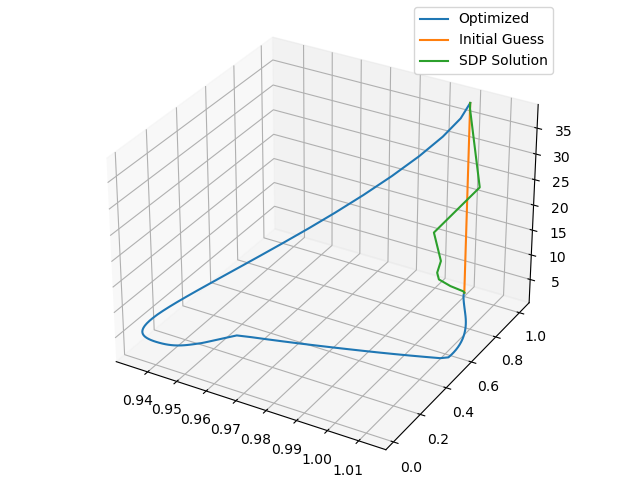

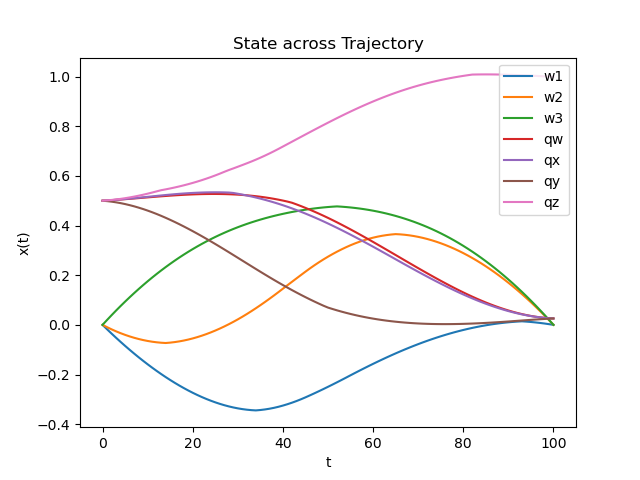

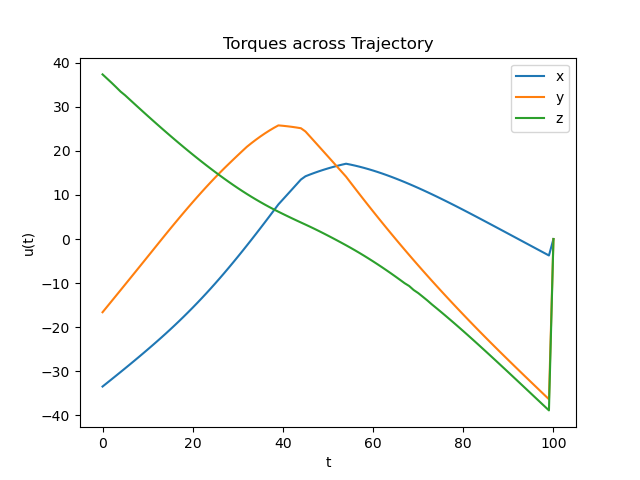

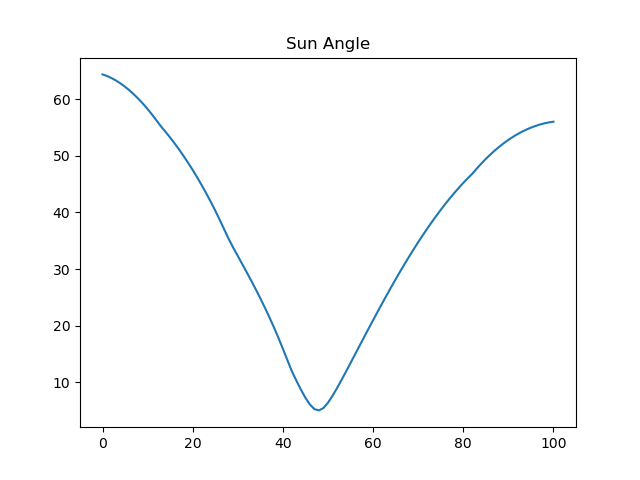

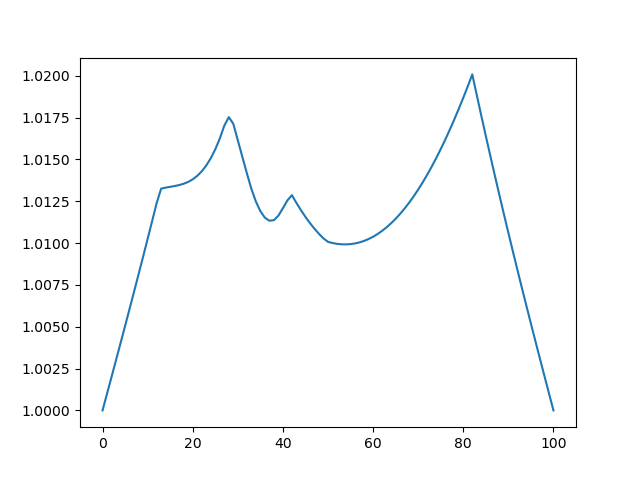

MovieWriter ffmpeg unavailable; using Pillow instead.


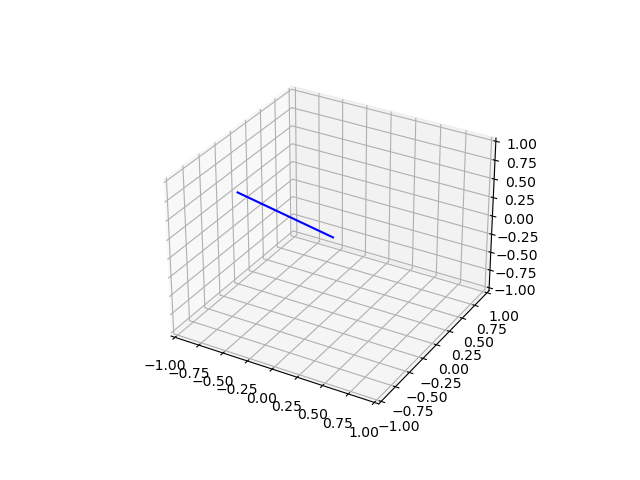

In [11]:
%matplotlib widget

print(trajectory[0])
x_opt = trajectory[1]
u_opt = trajectory[2]
# Calculate q space
qspace_vec = qspace(x_opt)
qspace_vec_guess = qspace(x_guess)
qspace_vec_sdp = qspace(trajectory_sdp[1])
print(qspace_vec.shape)

x = qspace_vec[0, :]
y = qspace_vec[1, :]
z = qspace_vec[2, :]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
plt.plot(x, y, z)
plt.plot(qspace_vec_guess[0, :], qspace_vec_guess[1, :], qspace_vec_guess[2, :])
plt.plot(qspace_vec_sdp[0, :], qspace_vec_sdp[1, :], qspace_vec_sdp[2, :])
plt.title("Trajectory in Q Space")
plt.legend(["Optimized", "Initial Guess", "SDP Solution"])
# plt.xlim((0, 1))
# plt.ylim((0, 1))
# plt.zlim((0, 1))
plt.show()

plt.figure()
plt.plot(x_opt)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("State across Trajectory")
plt.legend(["w1", "w2", "w3", "qw", "qx", "qy", "qz"])
plt.show()

plt.figure()
plt.plot(u_opt)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title("Torques across Trajectory")
plt.legend(["x", "y", "z"])
plt.show()

plt.figure()
plt.plot(get_trajectory_sunangle(x_opt, c, s, avoidance_angle=theta)[0])
plt.title("Sun Angle")
plt.show()

plt.figure()
plt.plot(get_trajectory_unit_quaternion(x_opt))
plt.show()

animate_quaternions(None, x_opt, c.T[0])
np.save("working_trajectory.npy", x_opt)

In [4]:
import os
os.environ["MOSEKLM_LICENSE_FILE"] = "mosek.lic"

# Test case 1 -- almost replicating paper, working nonlinear example
J = np.diag([100, 100, 100]) # kg*m^2
x0 = np.array([0, 0, 0, 0.5, 0.5, 0.5, 0.5]) # [w_x, w_y, w_z, q_w, q_x, q_y, q_z]
xn = np.array([0, 0, 0, 0.0258, 0.0258, 0.0258, 0.999]) # [w_x, w_y, w_z, q_w, q_x, q_y, q_z]
c = np.array([[0.75, 0.433, 0.5]]).T
s = np.array([[0, 0, 1]]).T # Boresight along z
dt = 0.05
N = 10
abstol = 1e-3
theta = 40

trajectory = optimize_trajectory(x0, xn, dt, N, J, attitude_constraint=True, avoidance_angle=theta, c=c, s=s, relaxation=True)

Constructing program...
Construction done!
Now constructing relaxation...
Decision variables:    state(0,0)    state(1,0)    state(2,0)    state(3,0)    state(4,0)    state(5,0)    state(6,0)    state(7,0)    state(8,0)    state(9,0)   state(10,0)    state(0,1)    state(1,1)    state(2,1)    state(3,1)    state(4,1)    state(5,1)    state(6,1)    state(7,1)    state(8,1)    state(9,1)   state(10,1)    state(0,2)    state(1,2)    state(2,2)    state(3,2)    state(4,2)    state(5,2)    state(6,2)    state(7,2)    state(8,2)    state(9,2)   state(10,2)    state(0,3)    state(1,3)    state(2,3)    state(3,3)    state(4,3)    state(5,3)    state(6,3)    state(7,3)    state(8,3)    state(9,3)   state(10,3)    state(0,4)    state(1,4)    state(2,4)    state(3,4)    state(4,4)    state(5,4)    state(6,4)    state(7,4)    state(8,4)    state(9,4)   state(10,4)    state(0,5)    state(1,5)    state(2,5)    state(3,5)    state(4,5)    state(5,5)    state(6,5)    state(7,5)    state(8,5)    state(9

(True, array([[ 4.18162065e-13, -3.60315028e-13, -3.55505675e-13,
         5.00000000e-01,  5.00000000e-01,  5.00000000e-01,
         5.00000000e-01],
       [ 3.95155033e-06, -3.05972996e-06, -3.57287419e-06,
         4.93344579e-01,  4.93555123e-01,  4.93405278e-01,
         5.06830021e-01],
       [ 8.40679959e-06, -6.95717790e-06, -7.54069126e-06,
         4.68754429e-01,  4.69392481e-01,  4.68983896e-01,
         5.32434552e-01],
       [ 1.23263901e-05, -8.89829380e-06, -1.20648744e-05,
         4.15028410e-01,  4.16641963e-01,  4.15495112e-01,
         5.88617977e-01],
       [ 1.54904840e-05, -1.27485852e-05, -1.62268292e-05,
         3.23565857e-01,  3.25319713e-01,  3.24235916e-01,
         6.84746176e-01],
       [ 1.91414390e-05, -1.52645139e-05, -1.90858163e-05,
         2.02571833e-01,  2.01357270e-01,  2.02367839e-01,
         8.13104859e-01],
       [ 1.50731882e-05, -1.28290095e-05, -1.61159479e-05,
         1.11181614e-01,  1.09940973e-01,  1.11071972e-01,
         9.

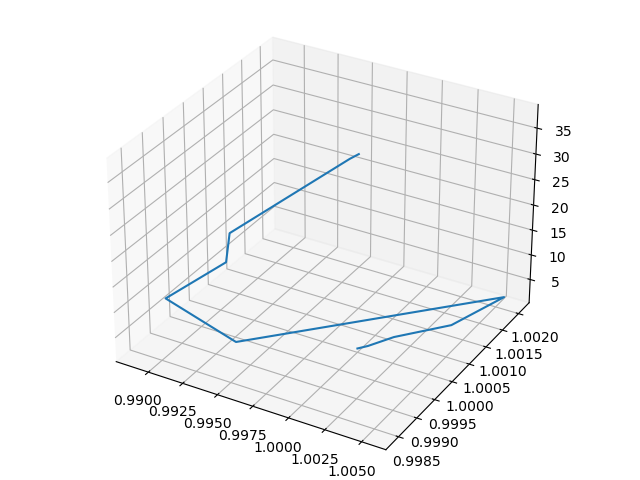

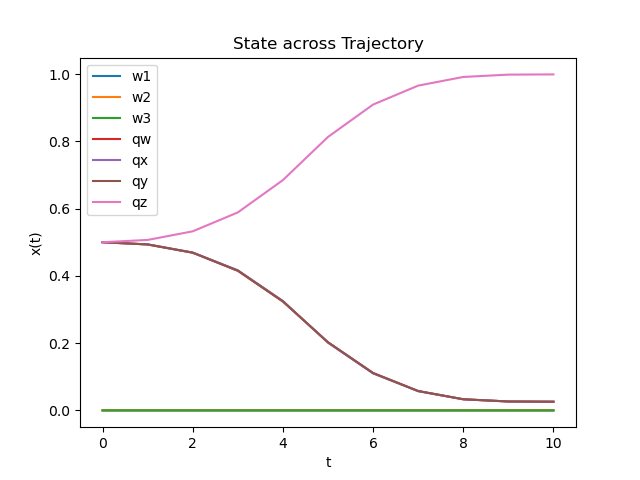

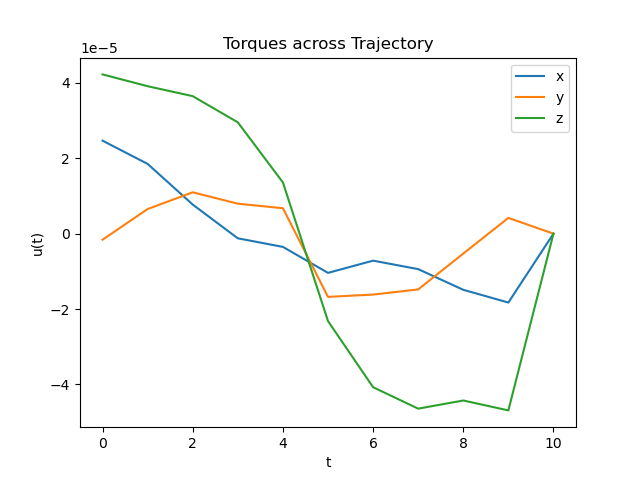

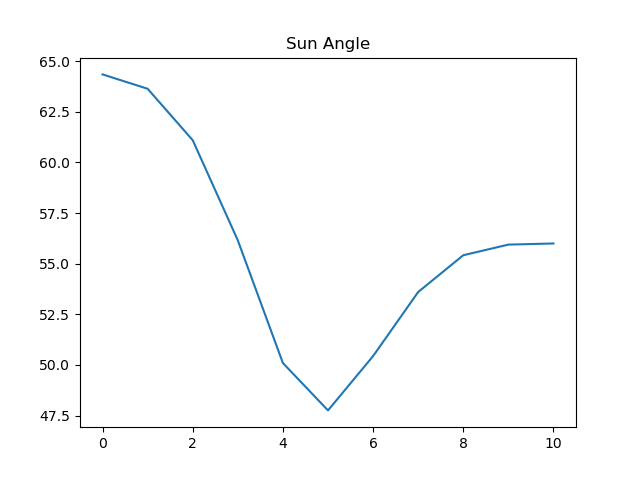

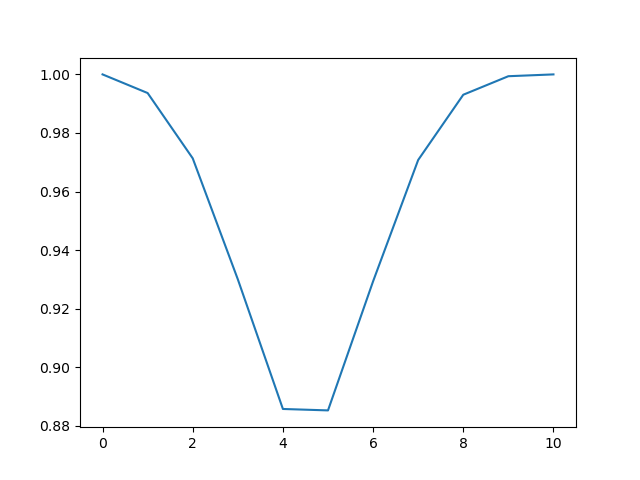

MovieWriter ffmpeg unavailable; using Pillow instead.


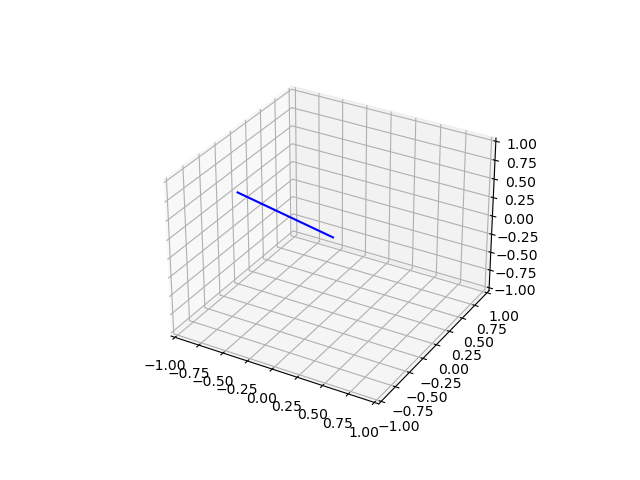

In [5]:
print(trajectory)

%matplotlib widget

print(trajectory[0])
x_opt = trajectory[1]
u_opt = trajectory[2]
# Calculate q space
qspace_vec = qspace(x_opt)
print(qspace_vec.shape)

x = qspace_vec[0, :]
y = qspace_vec[1, :]
z = qspace_vec[2, :]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
plt.plot(x, y, z)
plt.title("Trajectory in Q Space")
# plt.xlim((0, 1))
# plt.ylim((0, 1))
# plt.zlim((0, 1))
plt.show()

plt.figure()
plt.plot(x_opt)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("State across Trajectory")
plt.legend(["w1", "w2", "w3", "qw", "qx", "qy", "qz"])
plt.show()

plt.figure()
plt.plot(u_opt)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title("Torques across Trajectory")
plt.legend(["x", "y", "z"])
plt.show()

plt.figure()
plt.plot(get_trajectory_sunangle(x_opt, c, s, avoidance_angle=theta)[0])
plt.title("Sun Angle")
plt.show()

plt.figure()
plt.plot(get_trajectory_unit_quaternion(x_opt))
plt.show()

animate_quaternions(None, x_opt, c.T[0])
# np.save("working_trajectory.npy", x_opt)